# LDA - Sentimento em relação ao aquecimento global



## Leitura e análise inicial dos dados

Inicializar um DataFrame a partir do arquivo `../data//twitter/twitter_sentiment_data_cleaned.csv`

In [49]:
# Resposta:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lda_over_time.lda_over_time import LdaOverTime
from lda_over_time.models.lda_seq_model import LdaSeqModel

from lda_over_time.models.temporal_lda_model import TemporalLdaModel

import lda_over_time

In [2]:
tweets_path = "../data/twitter/twitter_sentiment_data_cleaned.csv"

data = pd.read_csv(
    tweets_path, 
    usecols=["DATE", "MESSAGE", "SENTIMENT"], 
    encoding="latin-1"
)

df_pro = data.loc[data['SENTIMENT'] == 1]
df_neutral = data.loc[data['SENTIMENT'] == 0]
df_anti = data.loc[data['SENTIMENT'] == -1]

Utiliza o *spacy* para filtrar e limpar os textos

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [4]:
filters = {
    "ADJ": "adjective",
    "ADV": "adverb",
    "NOUN": "noun",
    "PROPN": "proper noun",
    "VERB": "verb",
}

In [5]:
import re

def prepare_model(df):
    tweets = df['MESSAGE']
    clean_tweets = []

    for tweet in tweets:
        clean = []
        
        cleaned_tweet = re.sub('[^\x00-\x7F]+', '', tweet, flags=re.IGNORECASE)
        cleaned_tweet = re.sub('#|RT|https|\$|\||https:\/\/t.co\/\w+', '', cleaned_tweet, flags=re.IGNORECASE)
        cleaned_tweet = re.sub('climate change|global warming', '', cleaned_tweet, flags=re.IGNORECASE)

        for word in nlp(cleaned_tweet):
            if word.pos_ in filters:
                clean.append(word.lemma_)
                
        # append cleanned text
        clean_tweets.append(' '.join(clean))

    model = TemporalLdaModel(
            corpus = clean_tweets,         # list texts to be analysed
            dates = df["DATE"].values,     # dates of each article
            date_format = "%Y/%m/%d",        # date format is MM/DD/YYYY
            freq = "1M",                     # frequency of one semester
            n_topics = 10,                    # we want to get 5 topics
        )
    return model

In [6]:
#cleaned_pro = prepare_model(df_pro)
cleaned_neutral = prepare_model(df_neutral)
#cleaned_anti = prepare_model(df_anti)

In [7]:
%%time
main = LdaOverTime(cleaned_neutral)

CPU times: total: 2.95 s
Wall time: 26.4 s


In [8]:
%%time
for topic_id in range(1, 11):
    print(
        main.get_topic_words(
            topic_id=topic_id,  # select which topic we want
            timeslice=1,        # get the oldest time slice found in our trainning
            n=20               # we want the top 10 words for each topic
        )
    )

['//t.co', 'cold', 'Al', 'Gore', 'nuclear', 'be', 'still', 'so', 'late', 'less', 'make', 'too', 'save', 'stop', 'more', 'win', 'issue', 'Americans', 'ng', 'thank']
['//t.co', 'man', 'cause', 'so', 'make', 'Trump', 'debate', 'go', 'get', 'say', 'hot', 'real', 'here', 'find', 'think', '_', 'global', 'claim', 'just', 'have']
['//t.co', 'say', 'go', 'so', 'make', 'see', 'just', 'care', 'now', 'amp', 'year', 'last', 'hot', 'never', 'much', 'penguin', 'cause', 'talk', 'q', 'die']
['//t.co', 'think', 'real', 'thing', 'shut', 'amp', 'then', 'explain', 'penguin', 'good', 'club', 'great', 'do', 'have', 'love', 'story', 'Trump', 'new', 'about', 'talk']
['//t.co', 'people', 'say', 'amp', 'go', 'cause', 'so', 'believe', 'have', 'talk', 'Trump', 'just', 's', 'hear', 'scientist', 'donqt', 'other', 'get', 'fire', 'write']
['//t.co', 'believe', 'blame', 'cause', '%', 'end', 'need', 'New', 'snow', 'have', 'UK', 'human', 'stop', 'go', 'more', 'q', 'sa', 'public', 'cover', 'now']
['//t.co', 'tell', 'say',

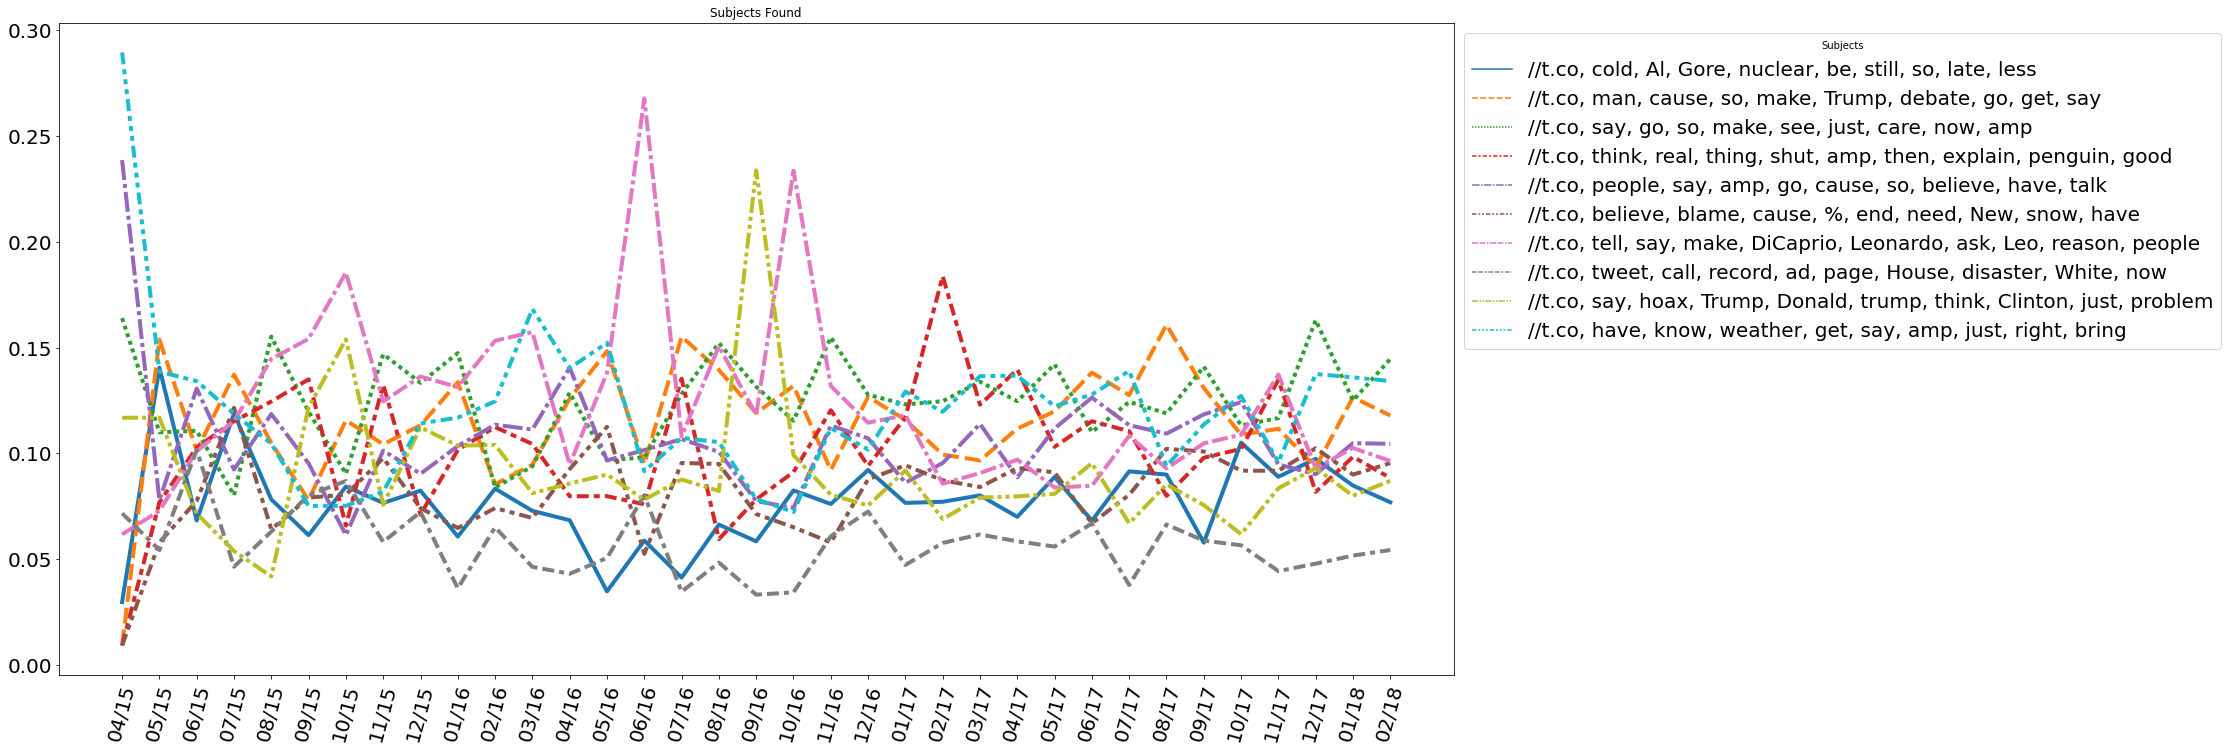

In [50]:
plt.figure(figsize=(25, 12))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
main.plot(
    title = 'Subjects Found',    # Plot's title
    
    legend_title="Subjects",     # Legend's title
    
    # path_to_save="./plot_of_news.png",   # Set location to save
    
    display=True,                # Display graph (default)
    
    rotation=75,                 # Rotate labels in 75º
    
    mode="line",                 # Plot lines (default)
    
    date_format="%m/%y",         # Set custom date format to MM/YYYY,
    linewidth=4
)
